<a href="https://colab.research.google.com/github/PratikhyaManas/Hyperparameter_Optimization/blob/master/optimization_param.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model Setup

We will be implementing the hyperparameter optimization using DesnseNet Model for training on the MNIST dataset.

In [0]:
%matplotlib inline

Import the fastai library, a high level wrapper for PyTorch (similar to Keras for Tensorflow).

This will help us quickly build a descent model so that we can focus on hyperparameter optimization.

In [0]:
import fastai
from fastai.vision import *

Import the Dataset

In [9]:
# MNIST Dataset
path = untar_data(URLs.MNIST_SAMPLE)

In [0]:
# Set up the training and validation datasets
data = ImageDataBunch.from_folder(path, bs = 512).normalize()

Define a function *fit_with()* that trains our model with certain hyperparameters.

In [0]:
# lr = learning rate
# wd = weight decay
# dp = dropout probability

def fit_with(lr,wd,dp):
    
    # Create the model using a specified dropout and weight decay
    learn = cnn_learner(data, models.resnet18, metrics=accuracy, ps=dp)
    
    
    # Train the model for a specified number of epochs using a specified max learning rate
    learn.fit_one_cycle(1, max_lr=lr)
    
    # Plot the loss over time
    learn.recorder.plot_losses()
    
    # Save, print, and return the model's accuracy
    acc = float(learn.validate(learn.data.valid_dl)[1])
    
    print("Current Accuracy:" + str(acc*100))
    
    return acc, learn

Train a basic model using random hyperparameters

epoch,train_loss,valid_loss,accuracy,time
0,2.545070,0.977681,0.478410,00:04


Current Accuracy:47.84102141857147


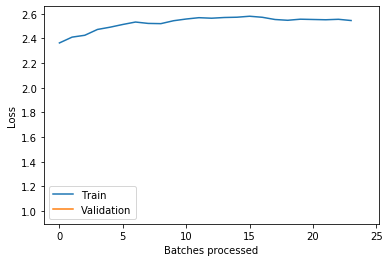

In [14]:
init_acc, init_model = fit_with(lr=1e-8, wd=0.6, dp=0.9)
init_model.save('/home/init_model')

### Grid Search

To execute Grid search, we need to first create a set of possible hyperparameter values.

In [0]:
lrs = [1e-1, 1e-2, 1e-3]
wds = [1e-1, 1e-2, 1e-3]
dps = [0.1, 0.3, 0.5]

Then we just loop over all the possible values, and save the model when the accuracy is the highest.

epoch,train_loss,valid_loss,accuracy,time
0,0.207822,0.260426,0.962218,00:04


Current Accuracy:96.22178673744202


epoch,train_loss,valid_loss,accuracy,time
0,0.225888,0.086614,0.994603,00:04


Current Accuracy:99.46025609970093


epoch,train_loss,valid_loss,accuracy,time
0,0.179957,0.090906,0.988224,00:04


Current Accuracy:98.82237315177917


epoch,train_loss,valid_loss,accuracy,time
0,0.416028,3.684148,0.949951,00:04


Current Accuracy:94.99509334564209


epoch,train_loss,valid_loss,accuracy,time
0,0.206490,0.039906,0.987733,00:04


Current Accuracy:98.77330660820007


epoch,train_loss,valid_loss,accuracy,time
0,0.256399,3.344783,0.864082,00:04


Current Accuracy:86.40824556350708


epoch,train_loss,valid_loss,accuracy,time
0,0.221467,1.868009,0.930324,00:04


Current Accuracy:93.0323839187622


epoch,train_loss,valid_loss,accuracy,time
0,0.215332,0.117632,0.982336,00:04


Current Accuracy:98.233562707901


epoch,train_loss,valid_loss,accuracy,time
0,0.171806,0.042796,0.993621,00:04


Current Accuracy:99.36211705207825


epoch,train_loss,valid_loss,accuracy,time
0,0.161425,0.021458,0.992640,00:04


Current Accuracy:99.26398396492004


epoch,train_loss,valid_loss,accuracy,time
0,0.179854,0.043497,0.990677,00:04


Current Accuracy:99.06771183013916


epoch,train_loss,valid_loss,accuracy,time
0,0.206820,0.034333,0.988714,00:04


Current Accuracy:98.87143969535828


epoch,train_loss,valid_loss,accuracy,time
0,0.182141,0.037626,0.986261,00:04


Current Accuracy:98.62610697746277


epoch,train_loss,valid_loss,accuracy,time
0,0.190563,0.025782,0.991659,00:05


Current Accuracy:99.16585087776184


epoch,train_loss,valid_loss,accuracy,time
0,0.219748,0.040305,0.989205,00:04


Current Accuracy:98.92051219940186


epoch,train_loss,valid_loss,accuracy,time
0,0.176205,0.035195,0.989696,00:04


Current Accuracy:98.96957874298096


epoch,train_loss,valid_loss,accuracy,time
0,0.174209,0.035425,0.992149,00:04


Current Accuracy:99.21491742134094


epoch,train_loss,valid_loss,accuracy,time
0,0.212625,0.051619,0.984789,00:05


Current Accuracy:98.47890138626099


epoch,train_loss,valid_loss,accuracy,time
0,0.328585,0.219715,0.908734,00:05


Current Accuracy:90.87340235710144


epoch,train_loss,valid_loss,accuracy,time
0,0.371174,0.210927,0.916094,00:04


Current Accuracy:91.6094183921814


epoch,train_loss,valid_loss,accuracy,time
0,0.450158,0.210678,0.917566,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:91.75662398338318


epoch,train_loss,valid_loss,accuracy,time
0,0.346333,0.204163,0.914622,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:91.46221876144409


epoch,train_loss,valid_loss,accuracy,time
0,0.386180,0.220557,0.906771,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:90.67713618278503


epoch,train_loss,valid_loss,accuracy,time
0,0.500592,0.225766,0.903827,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:90.38273096084595


epoch,train_loss,valid_loss,accuracy,time
0,0.311650,0.197176,0.924926,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:92.49264001846313


epoch,train_loss,valid_loss,accuracy,time
0,0.372263,0.173340,0.933759,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:93.37586164474487


epoch,train_loss,valid_loss,accuracy,time
0,0.472400,0.219016,0.905299,00:04


/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:568: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Current Accuracy:90.52993059158325
The highest accuracy is: 99.46025609970093


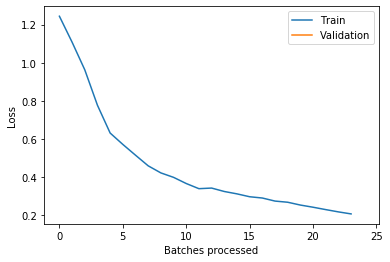

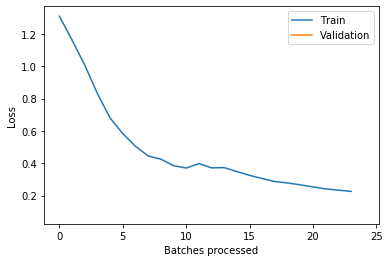

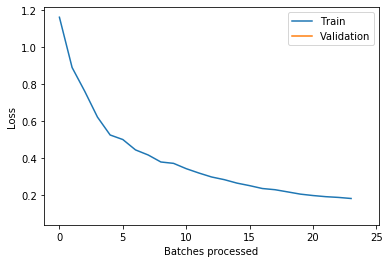

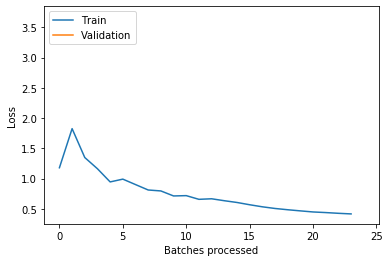

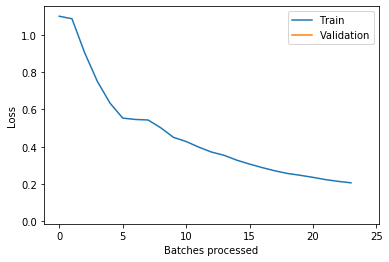

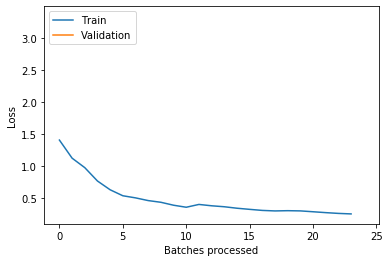

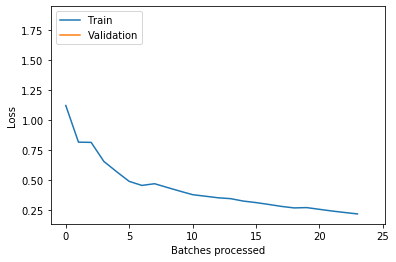

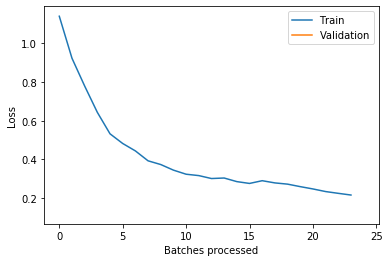

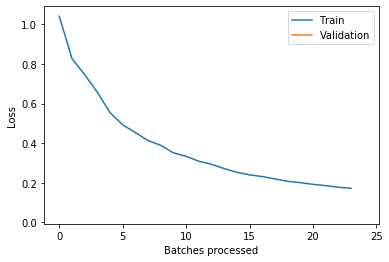

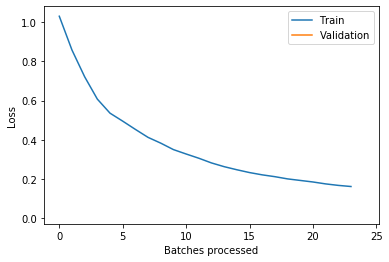

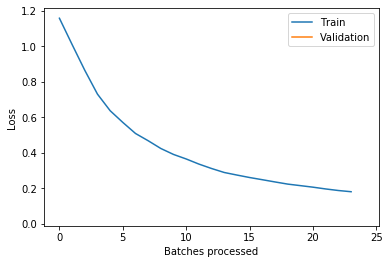

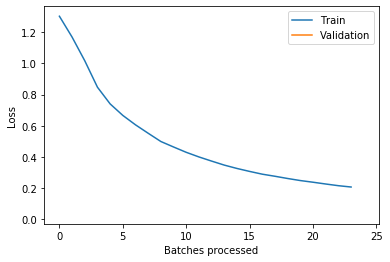

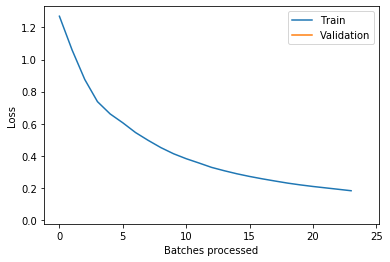

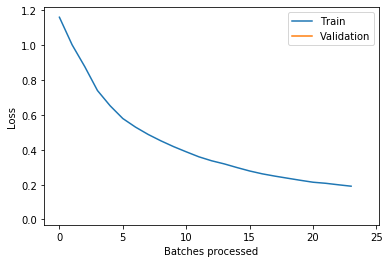

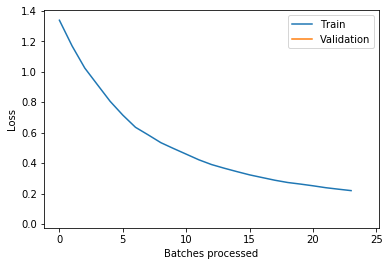

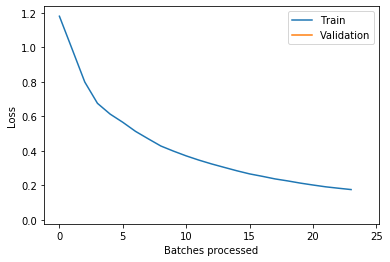

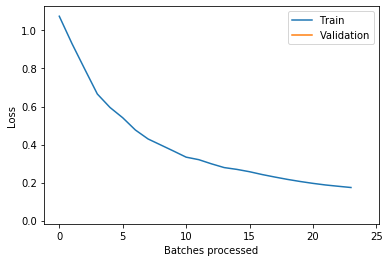

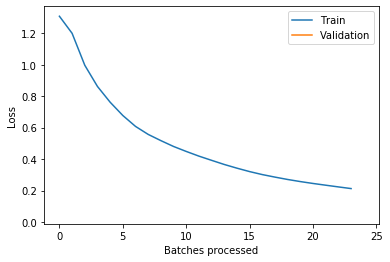

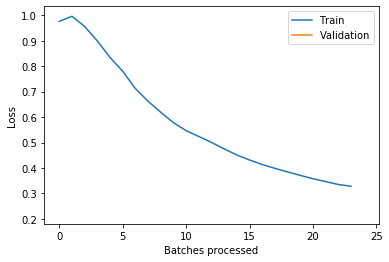

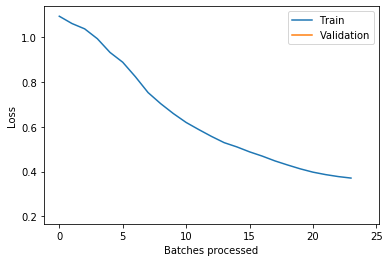

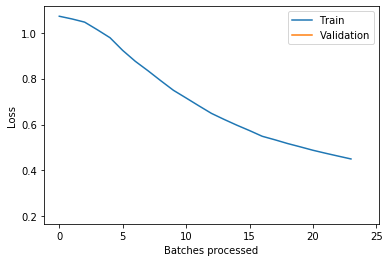

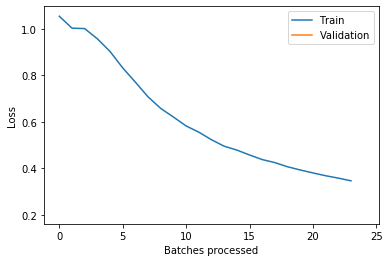

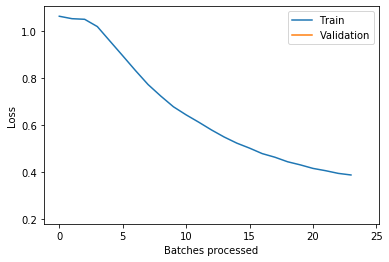

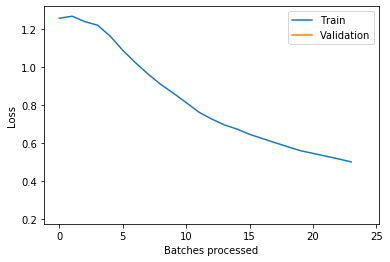

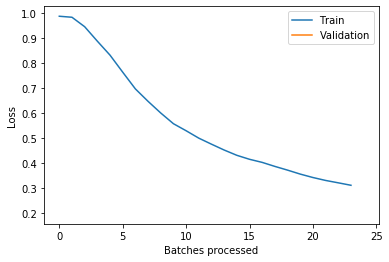

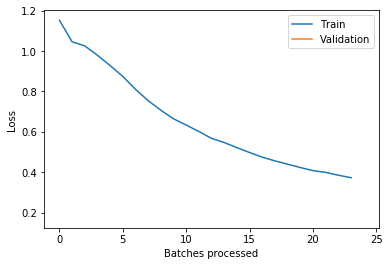

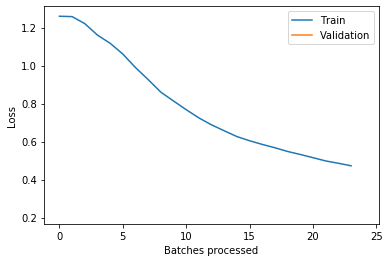

In [20]:
max_acc = 0

for lr in lrs:
  for wd in wds:
    for dp in dps:
      
      current_accuracy, model = fit_with(lr,wd,dp)
                
      if (current_accuracy > max_acc):
        model.save('/home/grid_search_best_model')
        max_acc = current_accuracy
        
        
print("The highest accuracy is: " + str(max_acc*100))

### Random Search

Random search is almost same as grid search, except we change the set of values that we loop over. 

Instead of a hard-coded set of values, we sample hyperparameters from a distribution i.e. choose them at random.

In [0]:
import random

max_acc = 0
# The number of different hyperparameter values to try
num_iters = 10

epoch,train_loss,valid_loss,accuracy,time
0,0.398830,0.211460,0.915113,00:04


Current Accuracy:91.5112853050232


epoch,train_loss,valid_loss,accuracy,time
0,0.764567,0.524638,0.729146,00:04


Current Accuracy:72.91462421417236


epoch,train_loss,valid_loss,accuracy,time
0,1.328589,0.846369,0.391070,00:04


Current Accuracy:39.10696804523468


epoch,train_loss,valid_loss,accuracy,time
0,1.082146,0.822969,0.531894,00:04


Current Accuracy:53.18940281867981


epoch,train_loss,valid_loss,accuracy,time
0,1.293864,0.976735,0.423945,00:04


Current Accuracy:42.39450395107269


epoch,train_loss,valid_loss,accuracy,time
0,1.404695,0.740902,0.520118,00:04


Current Accuracy:52.011775970458984


epoch,train_loss,valid_loss,accuracy,time
0,1.058923,0.738380,0.555447,00:04


Current Accuracy:55.54465055465698


epoch,train_loss,valid_loss,accuracy,time
0,0.953434,0.536227,0.689892,00:04


Current Accuracy:68.9892053604126


epoch,train_loss,valid_loss,accuracy,time
0,0.363443,0.192643,0.926398,00:04


Current Accuracy:92.63984560966492


epoch,train_loss,valid_loss,accuracy,time
0,1.166732,0.777701,0.562807,00:04


Current Accuracy:56.28066658973694
The highest accuracy is: 92.63984560966492


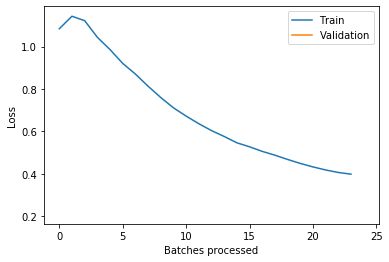

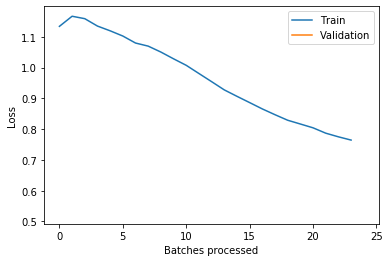

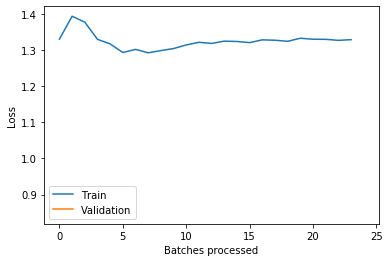

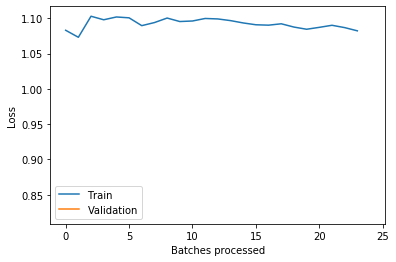

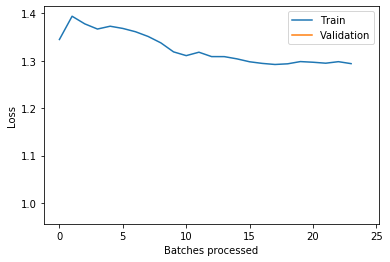

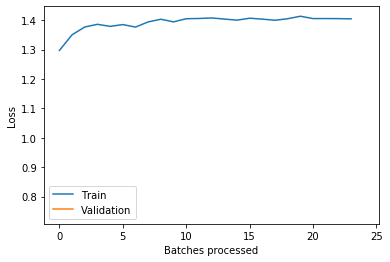

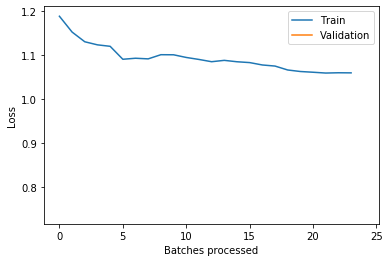

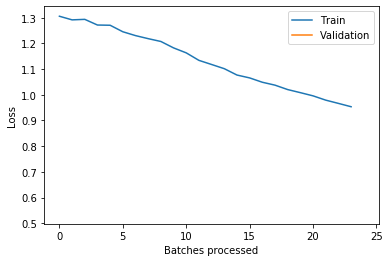

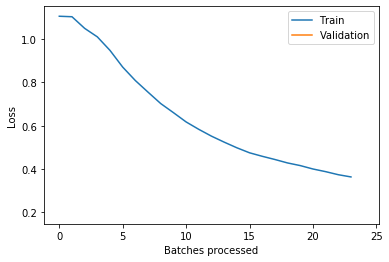

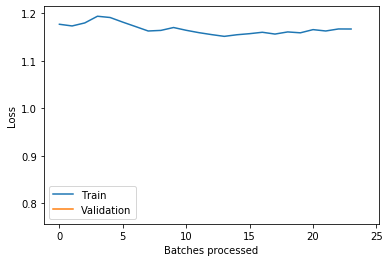

In [22]:
for iteration in range(num_iters):
  
  # Pick random hyperparameters in a specified range
  lr = 10**(-random.randint(3,7))
  wd = 10**(-random.randint(3,7))
  dp = random.uniform(0.1,0.5)
  
  current_accuracy, model = fit_with(lr,wd,dp)
  
  if (current_accuracy > max_acc):
    model.save('/home/grid_search_best_model')
    max_acc = current_accuracy
        
        
print("The highest accuracy is: " + str(max_acc*100))

###Bayesian Optimization

To implement the Bayesian algorithm we need to install the Bayesian Optimisation Package

In [23]:
!pip install bayesian-optimization

The function *fit_with()* won't work in it's current form with baysian-optimization.

So we'll make one small change: we're only going to return the accuracy, not the learn object.

In [0]:
def fit_with(lr,wd,dp):
    
    # Create the model using a specified dropout and weight decay
    learn = cnn_learner(data, models.resnet18, metrics=accuracy, ps=dp)
    
    
    # Train the model for a specified number of epochs using a specified max learning rate
    learn.fit_one_cycle(1, max_lr=lr)
    
    # Plot the loss over time
    learn.recorder.plot_losses()
    
    # Save, print, and return the model's accuracy
    acc = float(learn.validate(learn.data.valid_dl)[1])
    
    print("Accuracy:" + str(acc*100))
    
    # The small change: we're only going to return the accuracy
    
    return acc

|   iter    |  target   |    dp     |    lr     |    wd     |
-------------------------------------------------------------


epoch,train_loss,valid_loss,accuracy,time
0,0.194084,0.043540,0.986261,00:04


Accuracy:98.62610697746277
|  1        |  0.9863   |  0.2668   |  0.007231 |  0.000145 |


epoch,train_loss,valid_loss,accuracy,time
0,0.314697,0.141038,0.944063,00:04


Accuracy:94.40628290176392
|  2        |  0.9441   |  0.2209   |  0.001553 |  0.03703  |


epoch,train_loss,valid_loss,accuracy,time
0,0.206553,0.039738,0.985770,00:04


Accuracy:98.57703447341919
|  3        |  0.9858   |  0.5      |  0.01     |  0.4      |


epoch,train_loss,valid_loss,accuracy,time
0,0.873642,0.604589,0.642787,00:04


Accuracy:64.27870392799377
|  4        |  0.6428   |  0.5      |  0.0001   |  0.0001   |
Iteration 0: 
	{'target': 0.9862610697746277, 'params': {'dp': 0.2668088018810296, 'lr': 0.007231212485077366, 'wd': 0.00014573848945622018}}
Iteration 1: 
	{'target': 0.9440628290176392, 'params': {'dp': 0.22093302905273593, 'lr': 0.0015528833190894193, 'wd': 0.037026204048042244}}
Iteration 2: 
	{'target': 0.9857703447341919, 'params': {'dp': 0.5, 'lr': 0.01, 'wd': 0.4}}
Iteration 3: 
	{'target': 0.6427870392799377, 'params': {'dp': 0.5, 'lr': 0.0001, 'wd': 0.0001}}
{'target': 0.9862610697746277, 'params': {'dp': 0.2668088018810296, 'lr': 0.007231212485077366, 'wd': 0.00014573848945622018}}


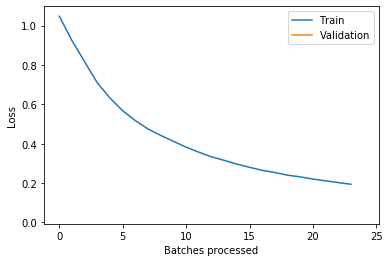

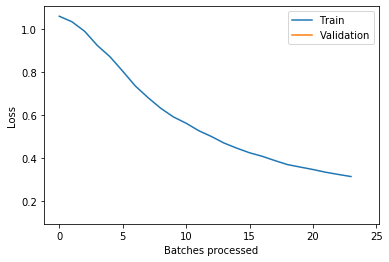

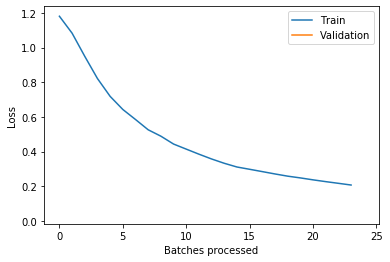

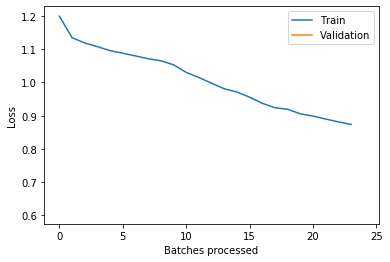

In [25]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'lr': (1e-4, 1e-2), 'wd':(1e-4,0.4), 'dp':(0.1,0.5)}

optimizer = BayesianOptimization(
    f=fit_with,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(init_points=2, n_iter=2,)



for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

print(optimizer.max)

The Bayesian Optimizer is super fast and as you can see that we got 98% + accuracy in just 4 Iterations

### Conclusion

In practice, Bayesian optimization will give the best results, followed by random search and then grid search.